PROBLEM STATEMENT:

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

LOADING THE DATASET

In [2]:
data=pd.read_csv('Unemployment in India.csv')

In [4]:
#Checking datset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
#Describing the dataset
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
#Check null/missing values
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
#Check the current column names and their count
new_column_names=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region']

#Assign the corrected list of column names
data.columns=new_column_names

#Verify the new column names
print("new columns:", data.columns)

new columns: Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region'],
      dtype='object')


In [9]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


CHECKING THE CORRELATION BETWEEN THE FEATURE OF DATASET

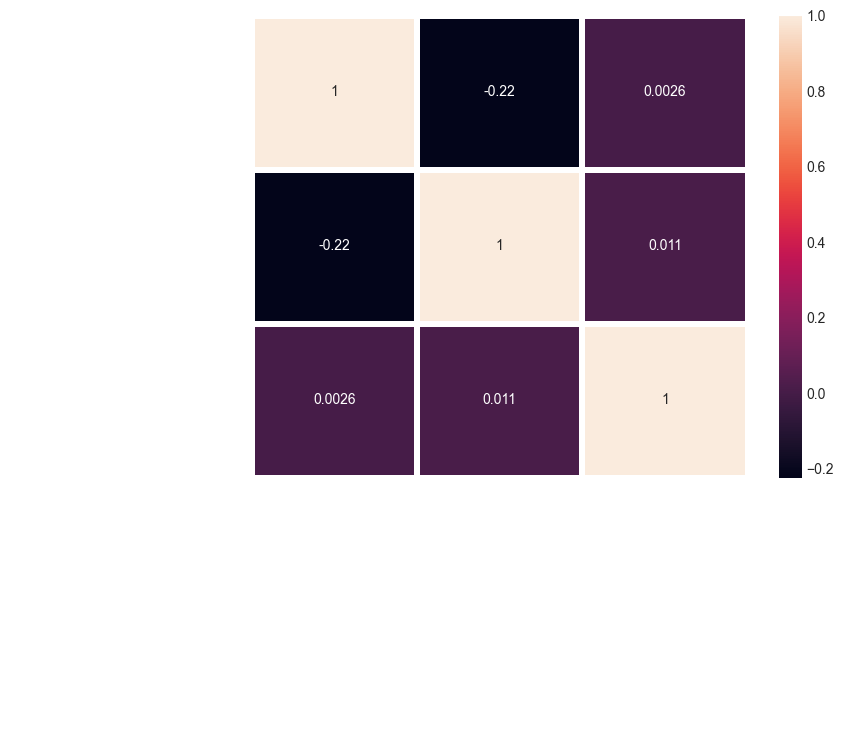

In [13]:
#Plotting correlation heatmap

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,6))

#Select only numeric columns for correlation calculation
#This will prevent the ValueError caused by non-numeric columns
numeric_data=data.select_dtypes(include=np.number)

#Set tick parameters
ax=sns.heatmap(numeric_data.corr(),annot=True,linewidth=3)

#Now you can call tick_params on the returned Axes object
ax.tick_params(size=10,color='w',labelsize=10,labelcolor='w')

ESTIMATED NO. OF EMPLOYEE ACCORDING TO DIFFERENT REGION OF INDIA

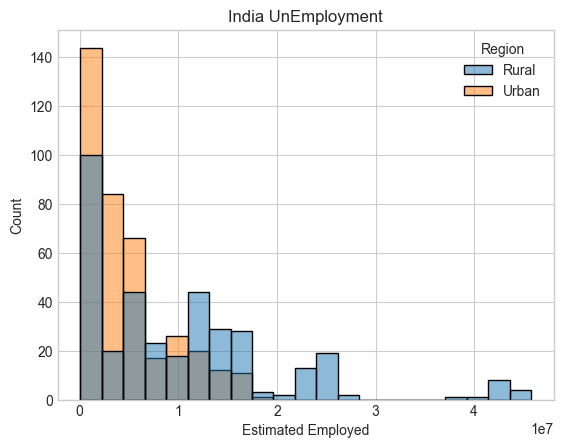

In [15]:
#Plotting histplot
#data.columns=['States','Date','Frequency','Estimated Unemployement Rate','Estimates Employed','Estimated Labour Participation Rate','Region','Longitude','Latitude']

plt.title('India UnEmployment')
sns.histplot(x='Estimated Employed',hue='Region',data=data)
plt.show()

UNEMPLOYMENT RATE ACCORDING TO DIFFERENT REGIONS OF INDIA

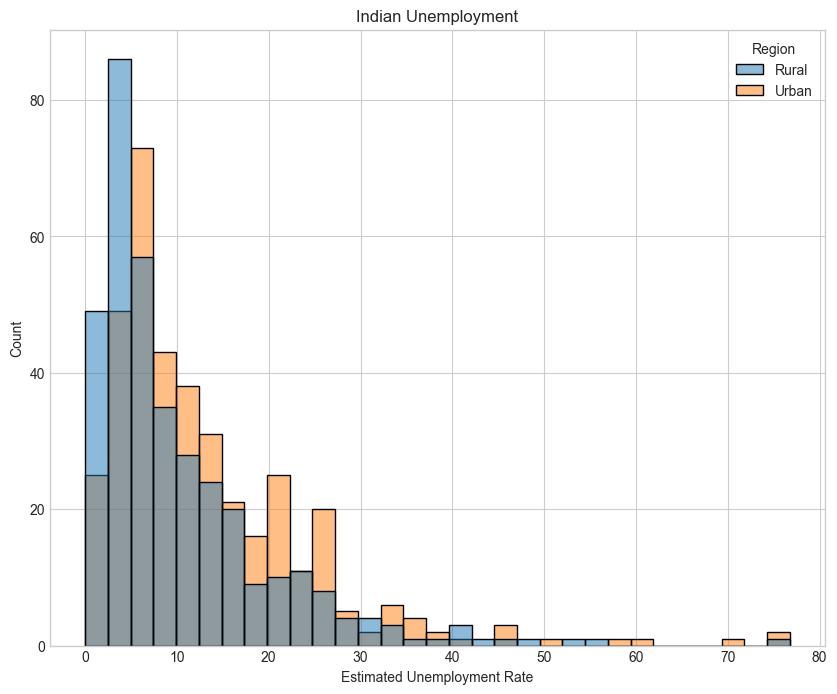

In [16]:
#Plotting histplot

plt.figure(figsize=(10,8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue='Region',data=data)
plt.show()

DASHBOARD TO ANALYZE THE UNEMPLOYMENT RATE OF EACH INDIAN STATE

In [ ]:
#Plotting sunburst

# Drop rows with missing values in 'States' or 'Region' columns
unemployment_cleaned = data.dropna(subset=['States','Region'])

# Select the required Columns
unemployment = unemployment_cleaned[['States','Region','Estimated Unemployment Rate']]

# Plot sunburst chart
figure = px.sunburst(
    unemployment,
    path=['Region', 'States'],
    values='Estimated Unemployment Rate',
    width=700,
    height=600,
    color_continuous_scale='RdYlGn',
    title='Unemployment Rate in India'
)

figure.show()
